In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

P = [(4.47,20.8177), (8.94,28.56), (-4.47,20.8177), (-4.47,28.56), (4.47,28.56), (-4.47,-20.8177), (4.47,-20.8177), (4.47,-28.56), (-4.47,-28.56), (4.47,-36.3023), (8.94,-28.56), (-4.47,-36.3023), (7.74227,24.09), (5.98203,35.2037), (-0.934484,37.451), (-7.23261,33.8148), (-8.74464,26.7013), (-3.55271e-15,28.56), (-9.58257e-15,19.62), (-4.47,-13.8785), (-4.47,-6.93924), (-4.47,3.55627e-12), (-4.47,6.93924), (-4.47,13.8785), (-1.43766e-15,-19.62), (4.47,-13.8785), (4.47,-6.93924), (4.47,3.55627e-12), (4.47,6.93924), (4.47,13.8785), (-3.55271e-15,-28.56), (7.74227,-33.03), (7.74227,-24.09), (-8.40085,-25.5023), (-8.40085,-31.6177), (-2.79661,32.1195), (2.23765,32.2399), (-5.81097,30.2989), (5.40742,31.1409), (-1.2027,24.4493), (1.54746,24.4014), (8.88178e-16,10.4089), (8.88178e-16,3.46962), (8.88178e-16,-3.46962), (0,-10.4089), (-8.88178e-16,-14.4465), (-2.66454e-15,14.4465), (1.2027,-24.4493), (-1.54746,-24.4014)]
tau = [(4,12,1), (3,35,37), (14,15,35), (3,17,35), (13,14,36), (15,37,35), (4,36,17), (17,36,35), (3,37,16), (1,38,4), (14,35,36), (4,38,36), (13,36,38), (4,0,12), (1,13,38), (15,16,37), (16,2,3), (18,40,39), (0,40,18), (3,39,17), (17,39,40), (4,17,40), (2,18,39), (0,4,40), (2,39,3), (19,5,24), (24,6,25), (18,29,0), (23,18,2), (19,24,45), (18,46,29), (24,25,45), (18,23,46), (22,41,23), (28,29,41), (28,41,42), (22,42,41), (21,43,42), (27,42,43), (21,42,22), (27,28,42), (19,44,20), (25,26,44), (20,43,21), (26,27,43), (20,44,43), (26,43,44), (25,44,45), (23,41,46), (19,45,44), (29,46,41), (24,48,47), (5,48,24), (7,47,30), (30,47,48), (8,30,48), (6,24,47), (5,8,48), (6,47,7), (7,31,10), (7,10,32), (6,7,32), (9,31,7), (33,34,8), (33,8,5), (34,11,8)]

#identify boundary points
boundary_range = [11,8,30,33,34,7,9,31,10,32,6,25,26,27,28,29,0,12,1,13,14,15,16,2,23,22,21,20,19,5]

On each element (triangle) there are three hat functions $\phi_i$. Each Hat function $\phi_i$ takes value $1$ on $x_i$ and $0$ on the others.

So I have $3$ affine functions $\phi_i(x,y)=a_i + b_i x + c_i y$, and hence $3$ different gradients

In [12]:
def basis_gradients(x,y):
    area = 0.5*np.linalg.det(np.array([[x[0],y[0],1],[x[1],y[1],1],[x[2],y[2],1]]))
    b = np.array([y[1]-y[2],y[2]-y[0],y[0]-y[1]])/(2*area)
    c = np.array([x[2]-x[1],x[0]-x[2],x[1]-x[0]])/(2*area)
    return area,b,c

x = [0,1,0]
y = [0,0,1]
area,b,c = basis_gradients(x,y)
#print(area,b,c)

In [13]:
#print(P[tau[0][0]]) #ptau11
#print(P[tau[0][1]]) #ptau12
#print(P[tau[0][2]]) #ptau13
#nodematr= np.array([P[tau[0][0]],P[tau[0][1]],P[tau[0][2]]])
#print(nodematr)

def getcoord(tauk):
    #INPUT: triangle K (indexes)
    #OUTPUT: get the (x,y) coords of each vertex of triangle K. Coords be stored in a 3x2 matrix
    # first column: x coords
    # second column: y coords
    coordmatr= np.array([P[tauk[0]],P[tauk[1]],P[tauk[2]]])
    return coordmatr

tauk = tau[0]
getcoord(tauk)

array([[ 4.47   , 28.56   ],
       [ 7.74227, 24.09   ],
       [ 8.94   , 28.56   ]])

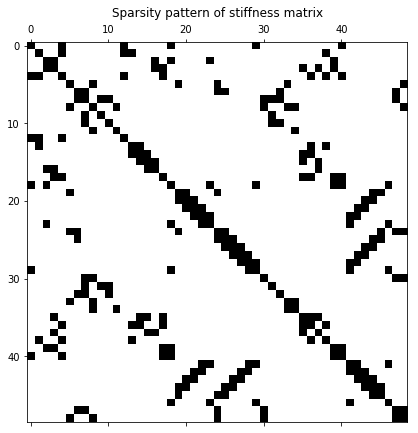

8.258038255328712e+16

In [14]:
# P = [(0,0),(1,0),(2,0),(2,1),(0,1)]
# tau = [(0,3,4),(0,1,3),(1,2,3)];

A = np.zeros([len(P),len(P)])    
numTrian = len(tau)

for K in range(0,numTrian): #loop over elements
    #print(K)
    loc2glb = tau[K]
    #print(loc2glb)
    coordmatr = getcoord(loc2glb) #get coordinates of the triangle
    x = coordmatr[:,0] #extract (x,y) vertex coordinates
    y = coordmatr[:,1]
    area ,b, c = basis_gradients(x,y) 
    #print(b,c)
    #compute element stiffness matrix
    fr = np.array([b[0]**2 + c[0]**2,b[0]*b[1]+c[0]*c[1],b[0]*b[2]+c[0]*c[2]])
    sr = np.array([b[1]*b[0]+c[1]*c[0],b[1]**2+c[1]**2,b[1]*b[2]+c[1]*c[2]]) #compute elemental matrix
    tr = np.array([b[2]*b[0]+c[2]*c[0],b[2]*b[1]+c[2]*c[1],b[2]**2+c[2]**2])
    AK = area*np.array([fr,sr,tr])
    #print(area)
    A[np.ix_(loc2glb,loc2glb)] = A[np.ix_(loc2glb, loc2glb)] + AK

#
#A = np.array([[1,2,4,2],[1,2,35,4],[3,4,7,0],[8,3,2,6]])
#print(A)
#A[np.ix_([0,1,3], [0,1,3])]  

plt.figure(figsize=(7,7))
plt.spy(A)
plt.title('Sparsity pattern of stiffness matrix')
plt.show()
np.linalg.cond(A)
#print(A-A.T) #symmetric

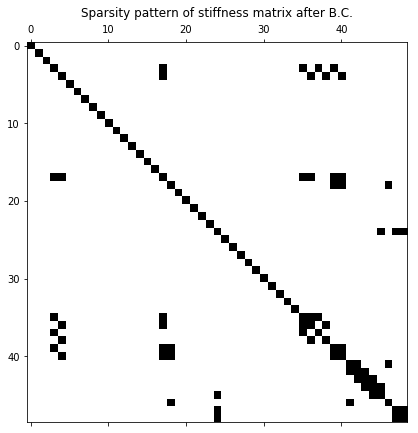

6.454362536326506

In [15]:
# Due to homogeneous Dirichlet boundary conditions, no basis functions at boundary points

for k in boundary_range:
    A[k,:] = np.zeros(len(P))
    A[:,k] = np.zeros(len(P))

for k in boundary_range:
    A[k,k] = 1


plt.figure(figsize=(7,7))
plt.spy(A)
plt.title('Sparsity pattern of stiffness matrix after B.C.')
plt.show()

np.linalg.cond(A) #
#print(A-A.T) #symmetric
